In [8]:
import numpy as np
import os
import cv2
from sklearn.metrics.pairwise import cosine_similarity
from keras.applications import EfficientNetB0
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing import image
from google.colab import drive
import matplotlib.pyplot as plt

In [9]:
model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    efficientnet_feature = model.predict(img_data)
    return efficientnet_feature.flatten()  # Returns the feature vector

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import os
from tqdm import tqdm 

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = preprocess_input(img_data)
    return img_data

# Mount Google Drive (if needed)
# drive.mount('/content/drive')

dataset_path = '/kaggle/input/vietnamese-foods/Images/Test'
image_paths = []
features = []

# Find all image files in the dataset directory
for root, dirs, files in os.walk(dataset_path):
    for img_file in files:
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, img_file))

# Load and preprocess images in batches
batch_data = np.array([load_and_preprocess_image(p) for p in tqdm(image_paths)])
batch_data = np.expand_dims(batch_data, axis=0) if len(batch_data.shape) == 3 else batch_data

# Predict features using the EfficientNet model
features = model.predict(batch_data, batch_size=32, verbose=1)
features = features.reshape((features.shape[0], -1))


100%|██████████| 5040/5040 [01:00<00:00, 83.51it/s] 


158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# function to find similar images based on cosine similarity
# using the precomputed features from the EfficientNet model
def find_similar_images(query_image_path, features, image_paths, top_n=5):
    """
    Trả về hai đối tượng:
        1. similar_images   : list[str]      – đường dẫn ảnh giống nhất
        2. similarity_scores: np.ndarray     – % độ tương đồng tương ứng
    """
    try:
        query_features = extract_features(query_image_path, model)
    except Exception as e:
        print(f"Error extracting features from query image: {e}")
        return [], np.array([])

    if features.size == 0:
        print("No features found in dataset.")
        return [], np.array([])

    similarities = cosine_similarity([query_features], features)[0]  # returns a 1D array of similarities

    similar_indices = similarities.argsort()[::-1][:top_n]

    similar_images   = [image_paths[i]          for i in similar_indices]
    similarity_scores = similarities[similar_indices] * 100   

    return similar_images, similarity_scores


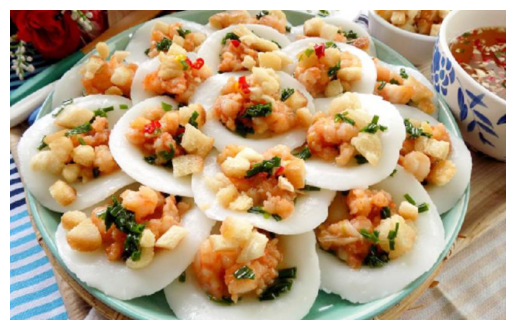

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Define the path to your query image
query_image_path ='/kaggle/input/vietnamese-foods/Images/Train/Banh beo/1.jpg' 

# Read and display the query image
img_1 = cv2.imread(query_image_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)
plt.axis('off')
plt.show()

similar_images, similarity_scores = find_similar_images(query_image_path, features, image_paths, top_n=5)


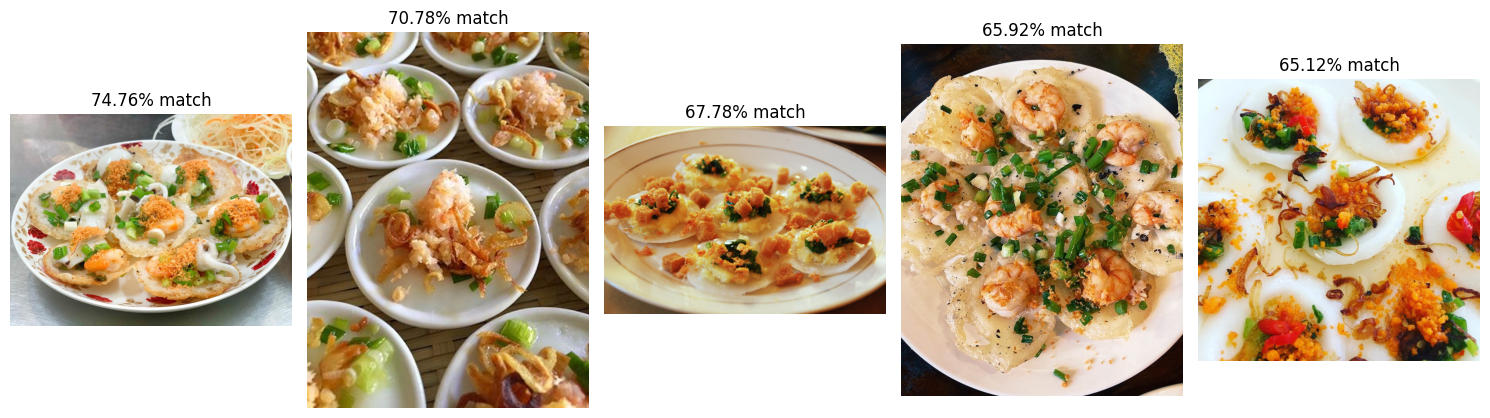

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Display similar images
if similar_images:
    plt.figure(figsize=(15, 5)) 
    for i, (img_path, score) in enumerate(zip(similar_images, similarity_scores)):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(similar_images), i + 1)
        plt.imshow(img)
        plt.title(f"{score:.2f}% match")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No similar images found.")
